## Milk Quality Prediction (Classification)

### About dataset
## This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk.
## This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
## Generally, the Grade or Quality of the milk depends on these parameters. These parameters play a vital role in the predictive analysis of the milk.

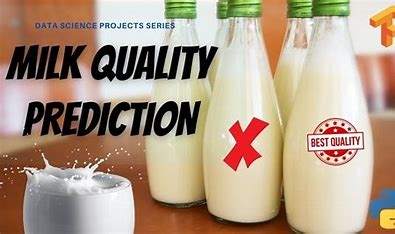

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv('milknew.csv')

In [116]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [117]:
df.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [119]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [120]:
df.shape

(1059, 8)

In [121]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [122]:
df.duplicated().sum()

976

In [123]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [124]:
df.drop_duplicates()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
930,6.6,38,0,1,1,1,255,high
942,6.6,45,1,0,0,1,255,medium
957,6.8,41,1,1,1,0,255,high
985,6.5,45,1,0,0,0,246,medium


In [125]:
df.shape

(1059, 8)

In [126]:
import warnings
warnings.filterwarnings('ignore')

In [127]:
df['pH'].value_counts()

pH
6.8    249
6.5    189
6.6    159
6.7     82
3.0     70
9.0     61
8.6     40
7.4     39
4.5     37
9.5     24
8.1     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: count, dtype: int64

In [128]:
df['pH'].unique()

array([6.6, 8.5, 9.5, 5.5, 4.5, 8.1, 6.7, 5.6, 8.6, 7.4, 6.8, 6.5, 4.7,
       3. , 9. , 6.4])

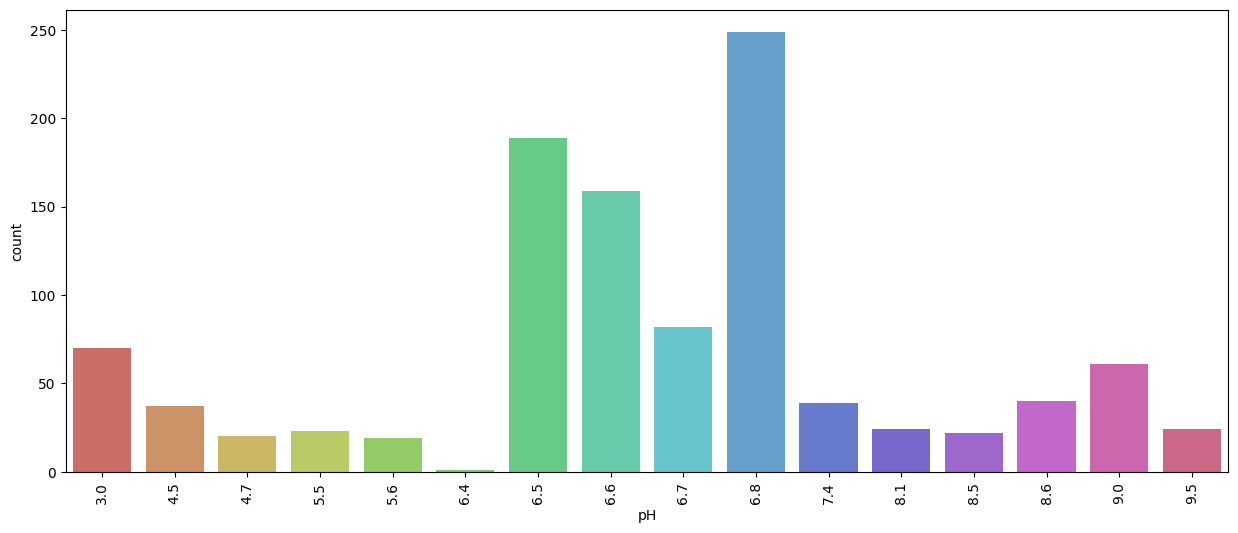

In [129]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='pH',
              palette= 'hls')
plt.xticks(rotation=90)
plt.show()

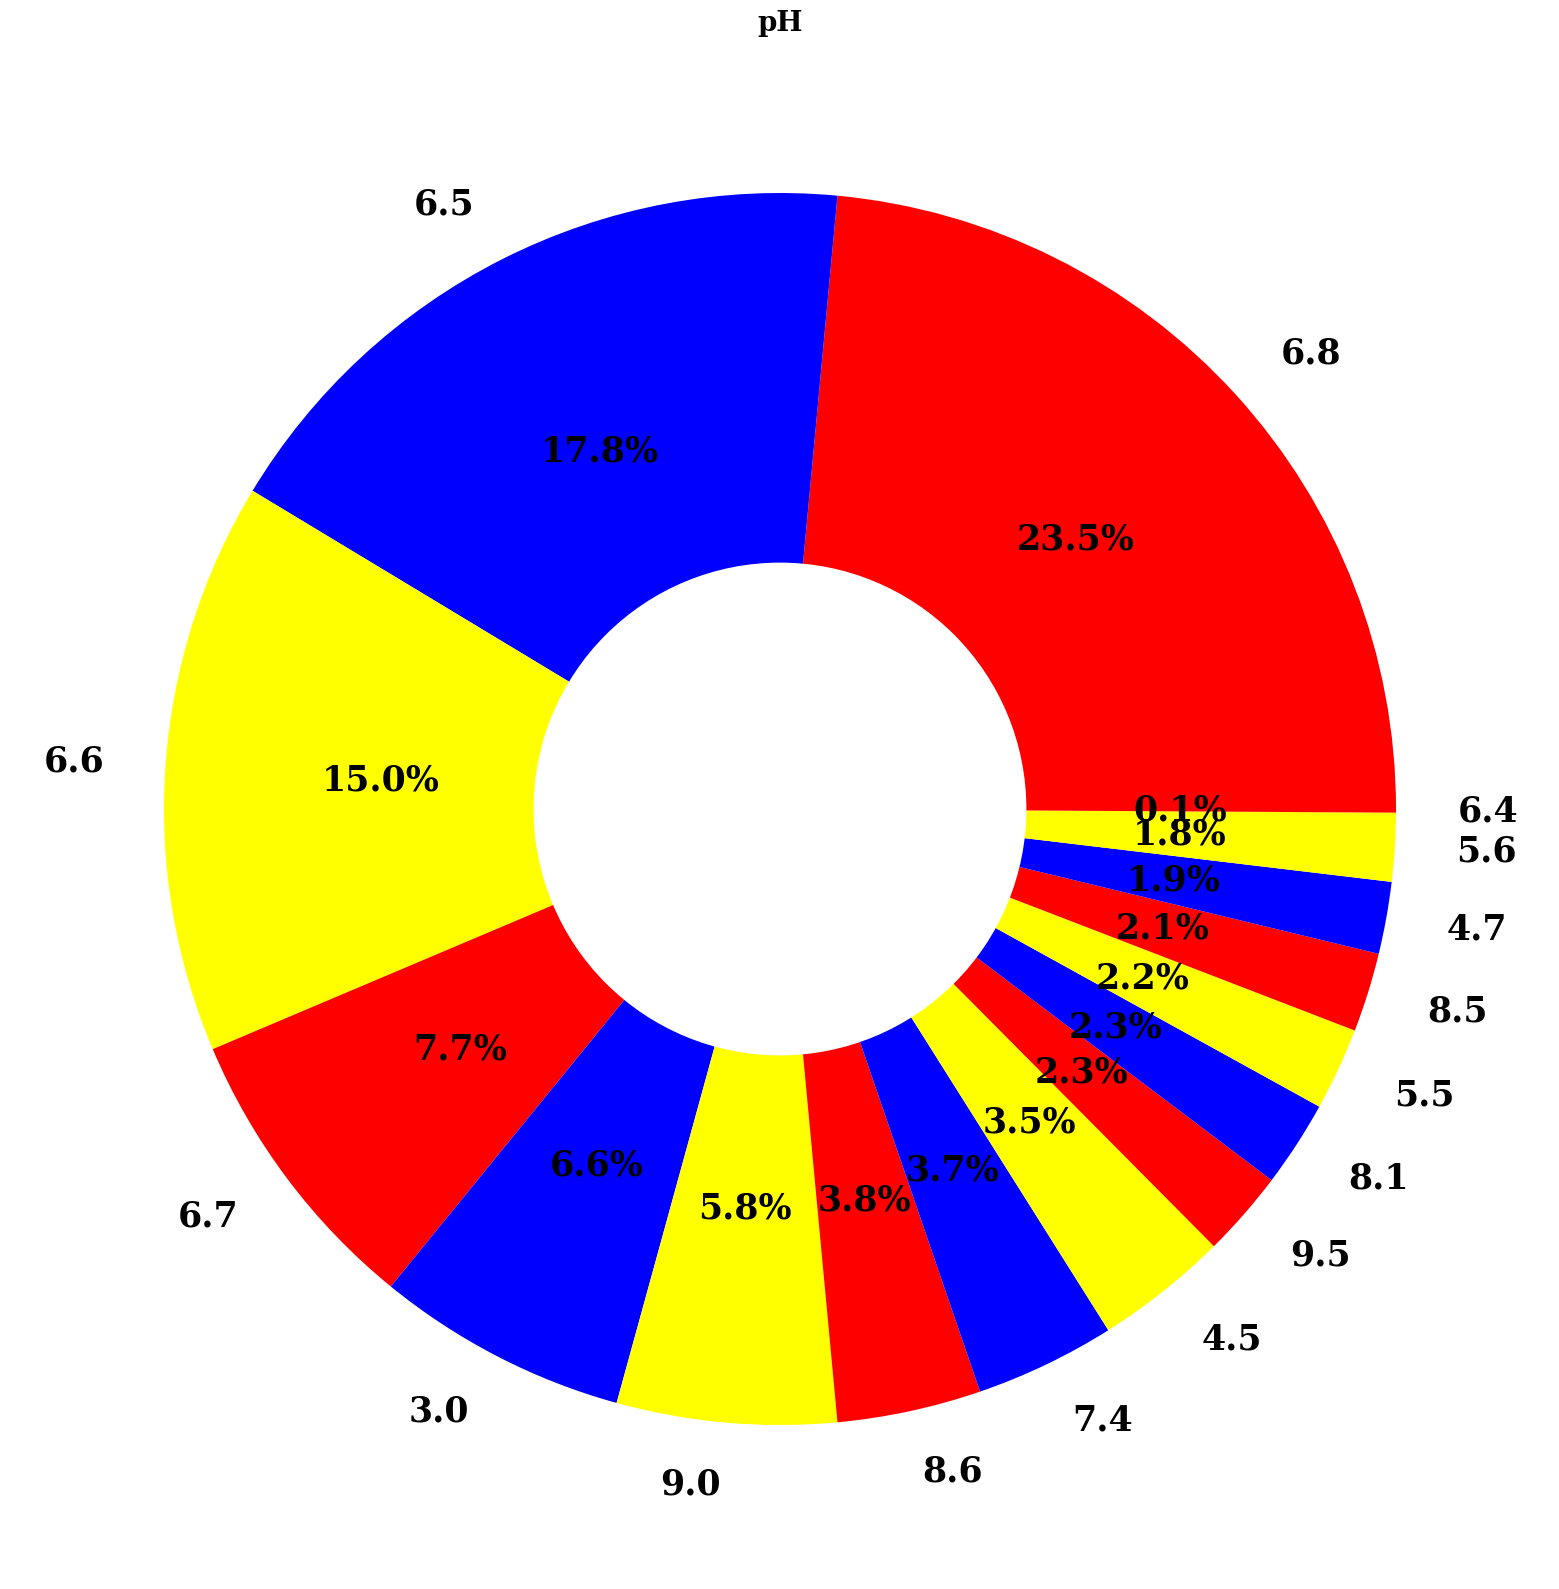

In [130]:
label_data = df['pH'].value_counts()
explode = (0.0,0.0,0.0)
plt.figure(figsize=(30, 20))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors=['red','blue','yellow'],
                               pctdistance=0.65,
                               shadow=False,
                               labeldistance=1.1, 
                              startangle=0,
                              autopct='%1.1f%%',
                              radius=1, 
                              counterclock=True, 
                              textprops={'fontsize': 25,
                                        'color': 'black',
                                        'weight': 'bold',
                                        'family': 'serif' })
plt.setp(pcts, color = 'black')

hfont = {'fontname':'serif','weight':'bold'}
plt.title('pH',size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [131]:
df['Temprature'].unique()

array([35, 36, 70, 34, 37, 45, 60, 66, 50, 55, 90, 38, 40, 43, 42, 41, 65],
      dtype=int64)

In [132]:
df['Temprature'].value_counts()

Temprature
45    219
38    179
40    132
37     83
43     77
36     66
50     58
55     48
34     40
41     30
66     24
35     23
70     22
65     22
60     18
90     17
42      1
Name: count, dtype: int64

In [133]:
df['Grade'].value_counts()

Grade
low       429
medium    374
high      256
Name: count, dtype: int64

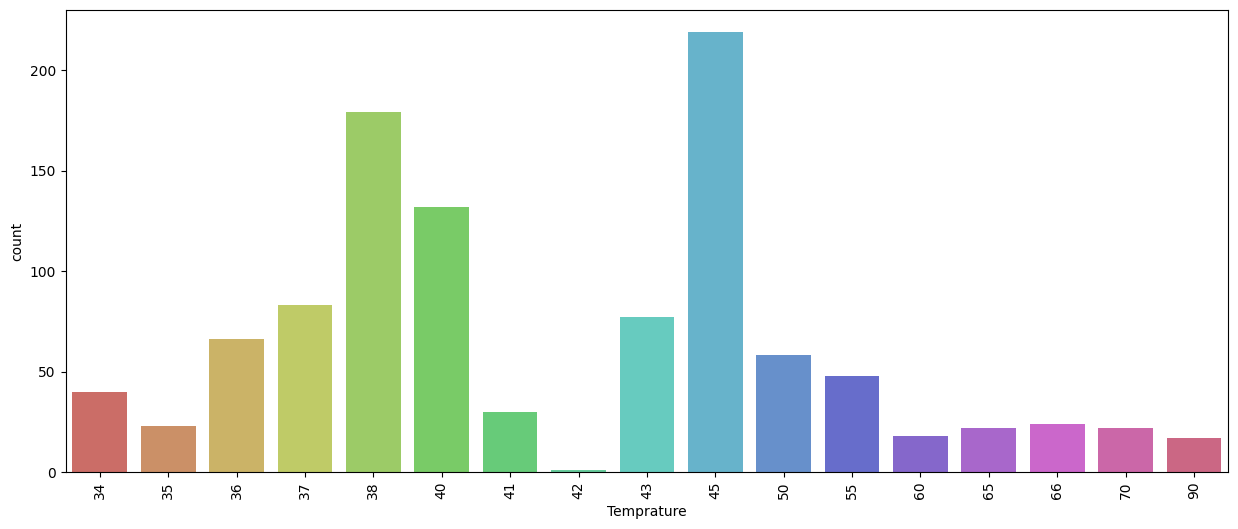

In [134]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Temprature',
              palette= 'hls')
plt.xticks(rotation=90)
plt.show()

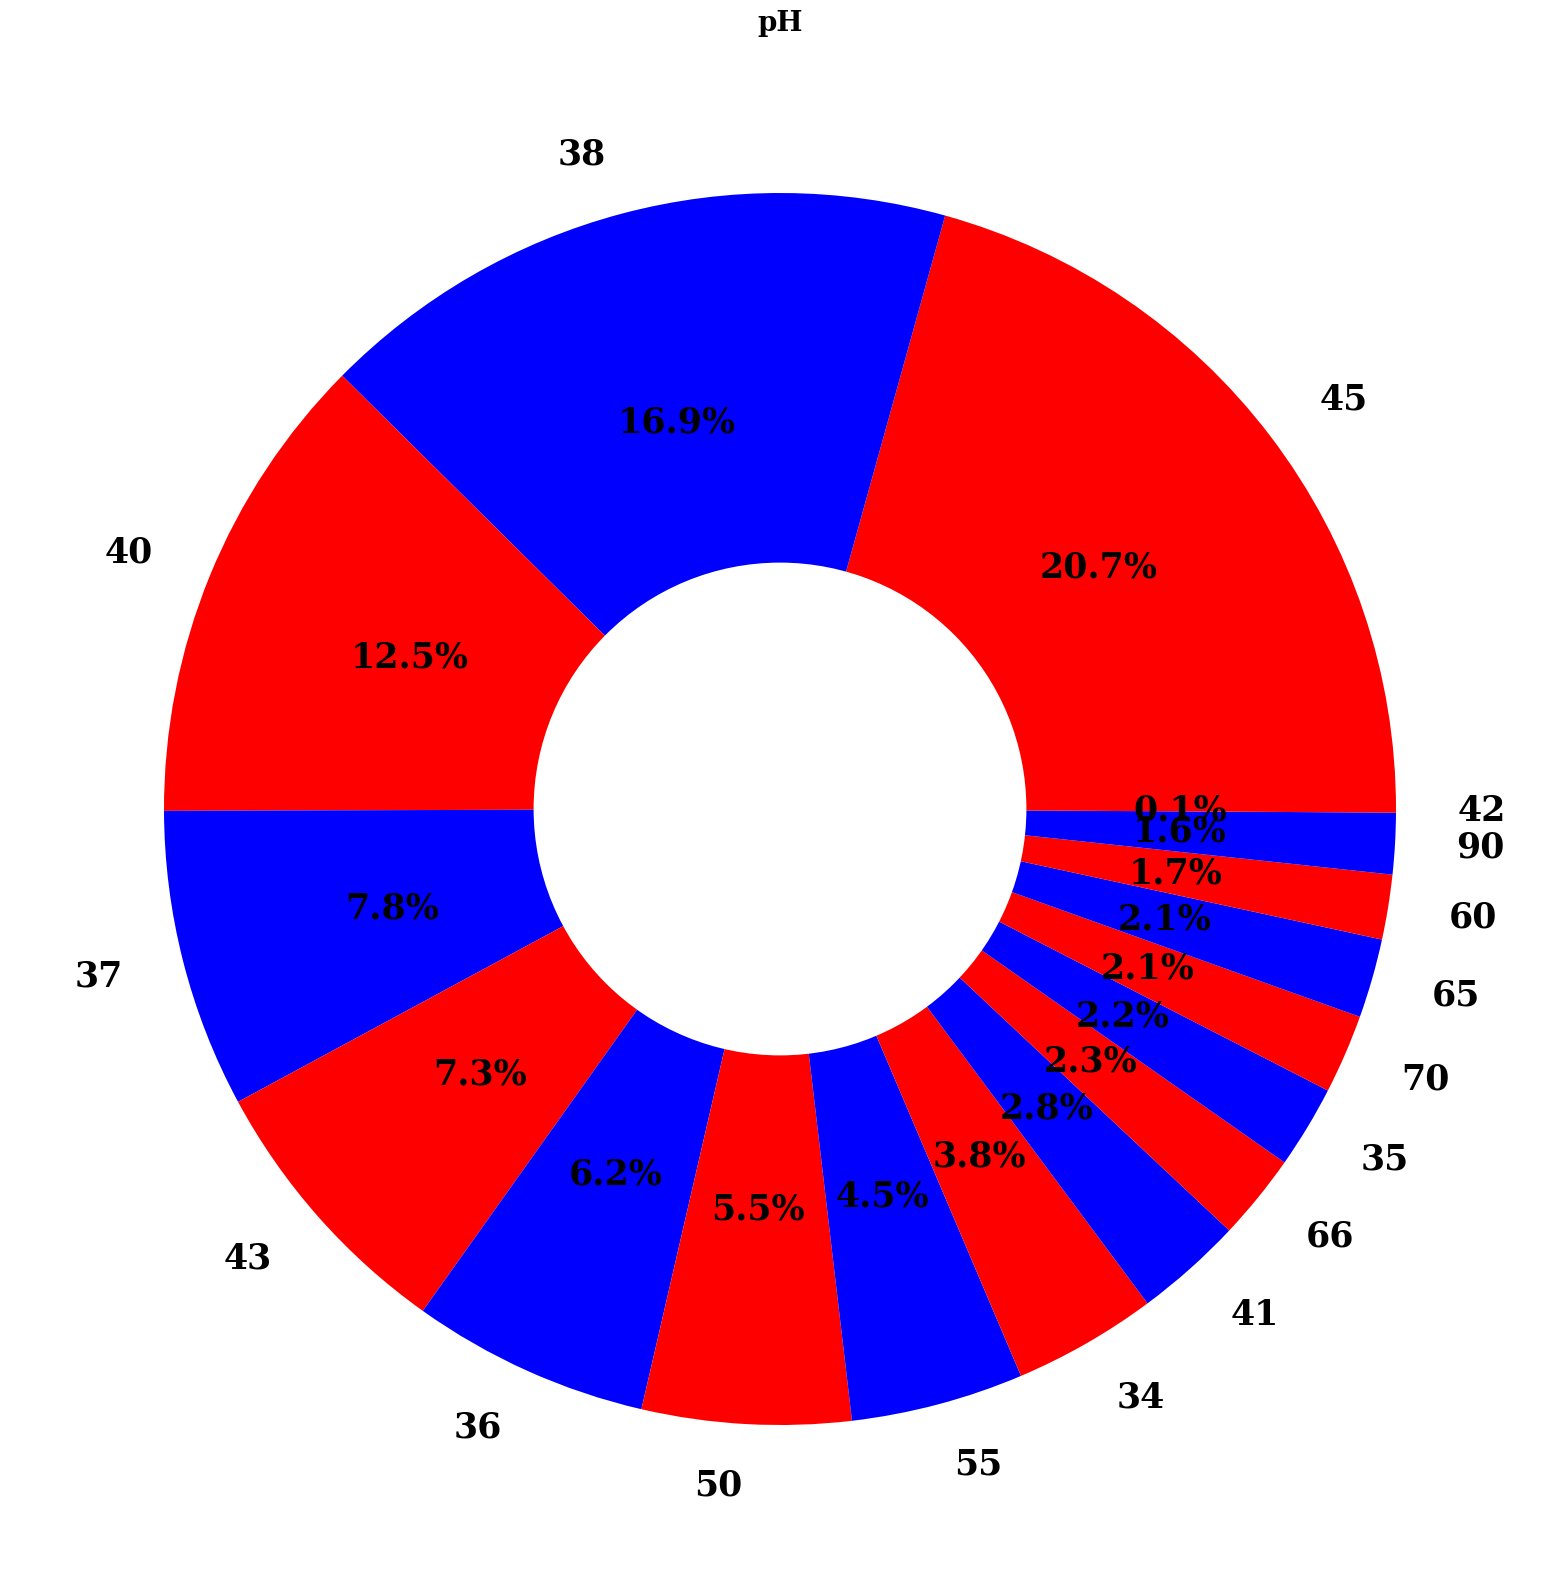

In [135]:
label_data = df['Temprature'].value_counts()
explode = (0.0,0.0,)
plt.figure(figsize=(30, 20))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors=['red','blue'],
                               pctdistance=0.65,
                               shadow=False,
                               labeldistance=1.1, 
                              startangle=0,
                              autopct='%1.1f%%',
                              radius=1, 
                              counterclock=True, 
                              textprops={'fontsize': 25,
                                        'color': 'black',
                                        'weight': 'bold',
                                        'family': 'serif' })
plt.setp(pcts, color = 'black')

hfont = {'fontname':'serif','weight':'bold'}
plt.title('pH',size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

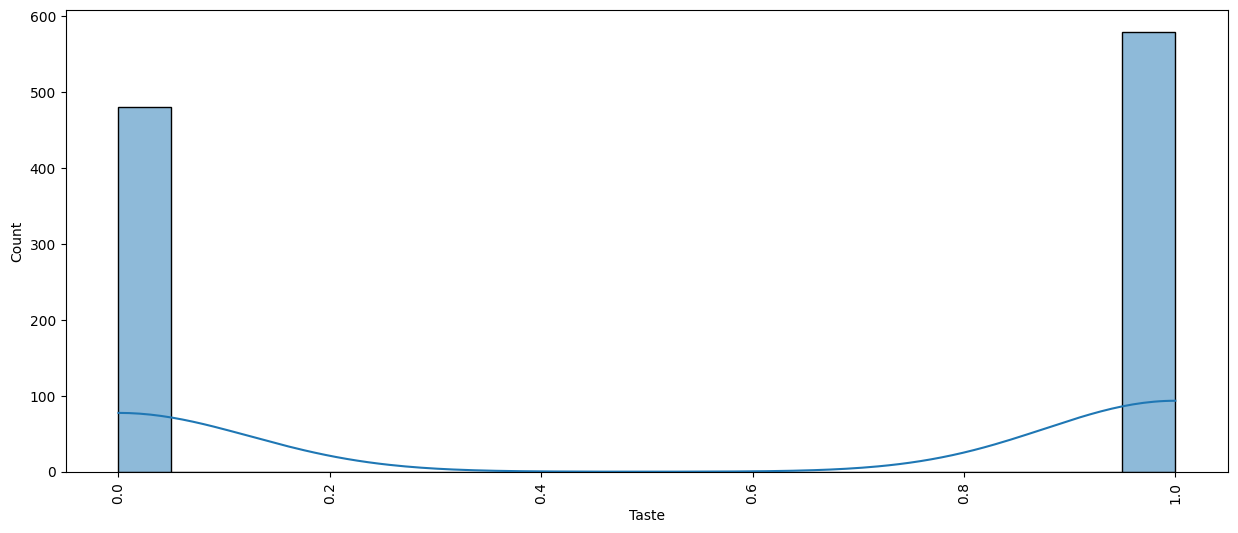

In [136]:
plt.figure(figsize=(15,6))
sns.histplot(df['Taste'],bins=20,kde=True, palette='husl')
plt.xticks(rotation = 90)
plt.show()

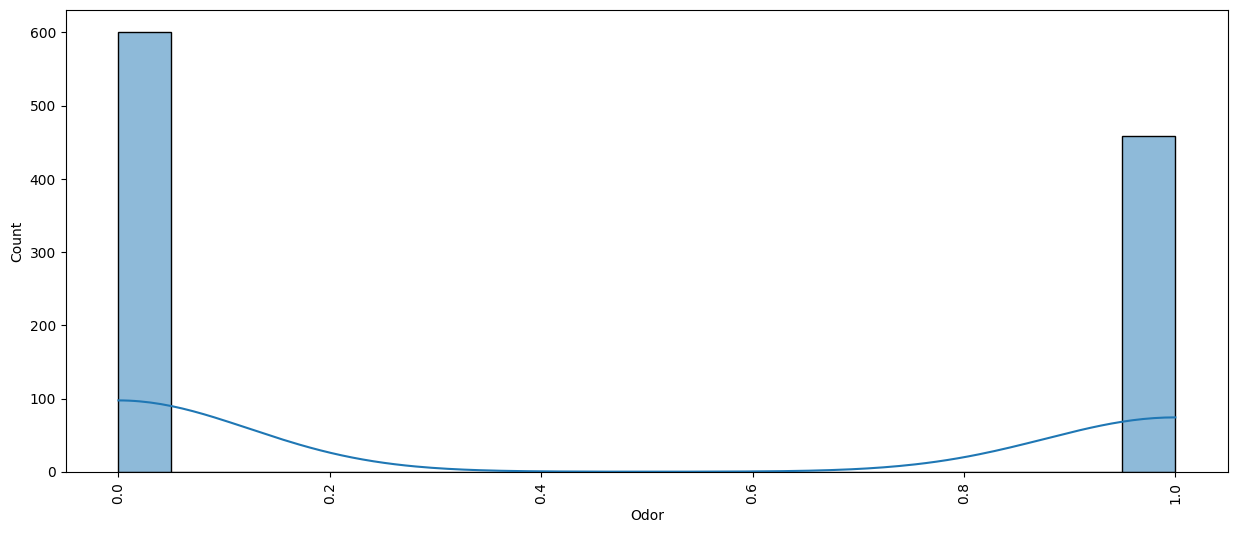

In [137]:
plt.figure(figsize=(15,6))
sns.histplot(df['Odor'],bins=20,kde=True, palette='husl')
plt.xticks(rotation = 90)
plt.show()

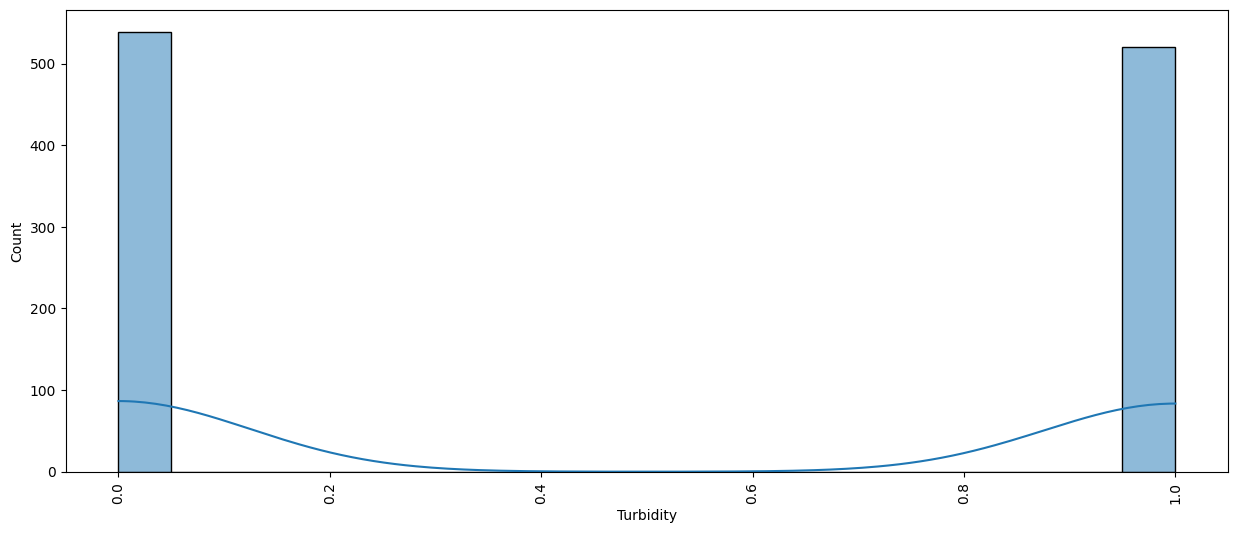

In [138]:
plt.figure(figsize=(15,6))
sns.histplot(df['Turbidity'],bins=20,kde=True, palette='husl')
plt.xticks(rotation = 90)
plt.show()

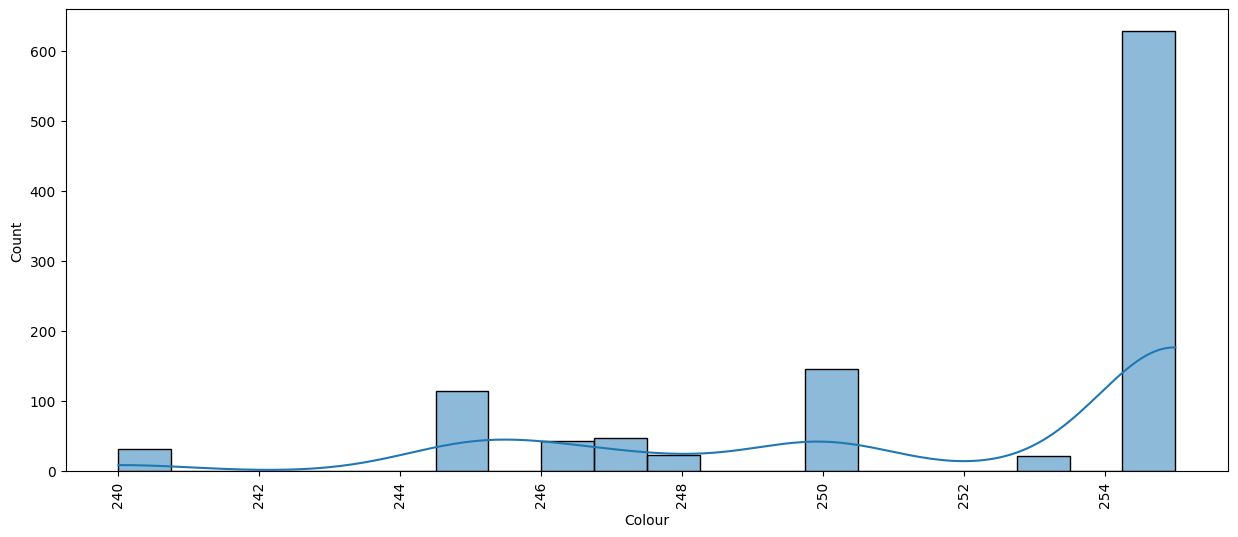

In [139]:
plt.figure(figsize=(15,6))
sns.histplot(df['Colour'],bins=20,kde=True, palette='husl')
plt.xticks(rotation = 90)
plt.show()

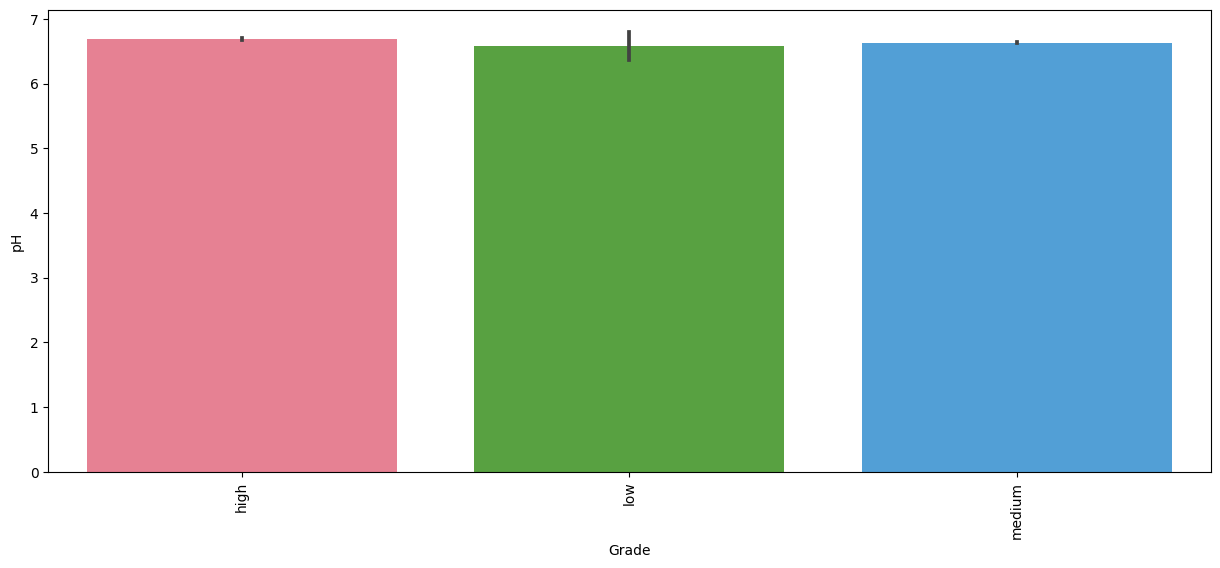

In [140]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['pH'],x =df['Grade'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

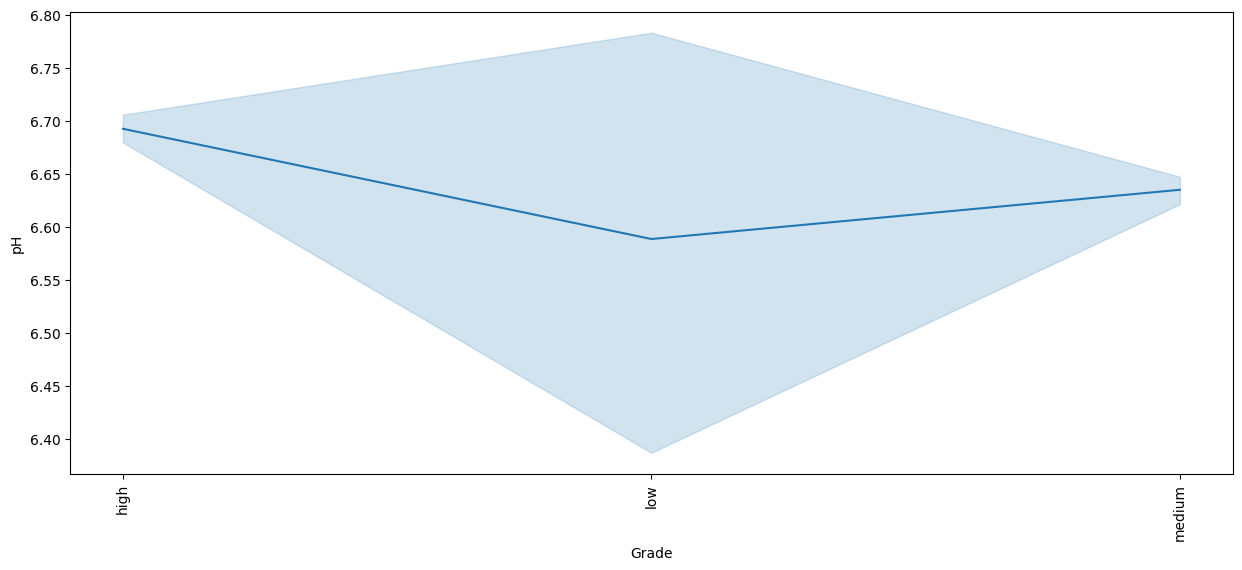

In [141]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['pH'],x =df['Grade'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

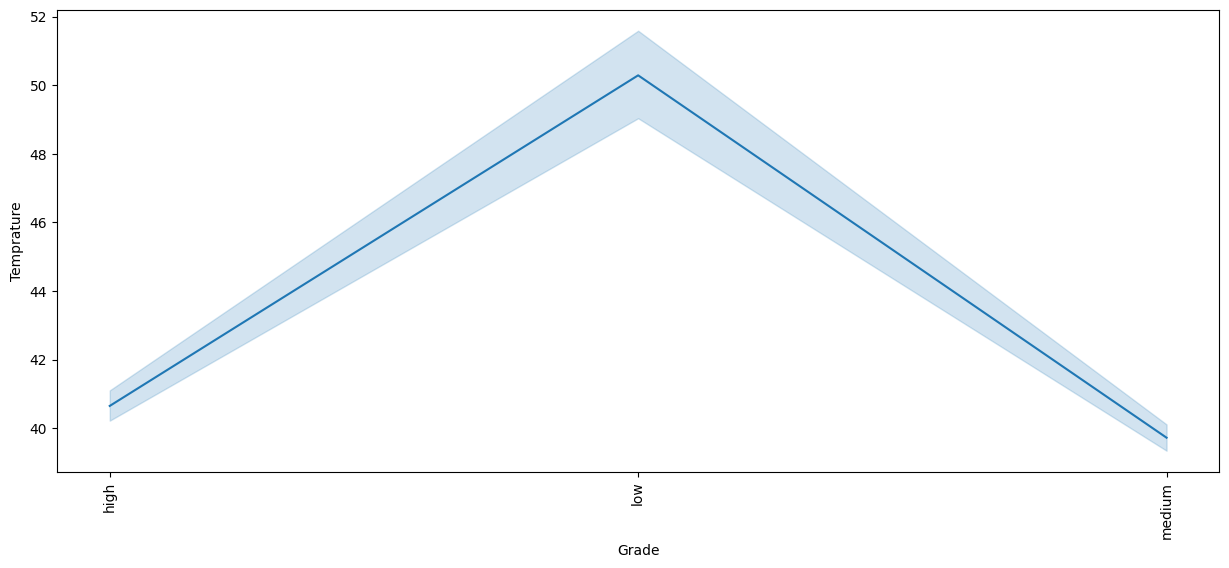

In [142]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['Temprature'],x =df['Grade'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

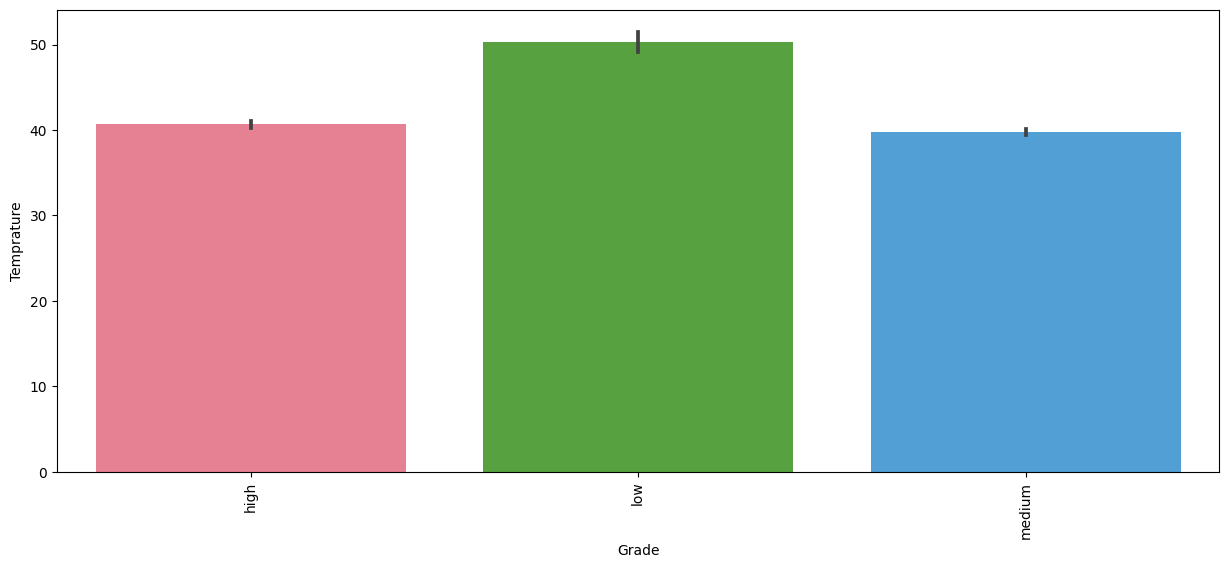

In [143]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['Temprature'],x =df['Grade'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

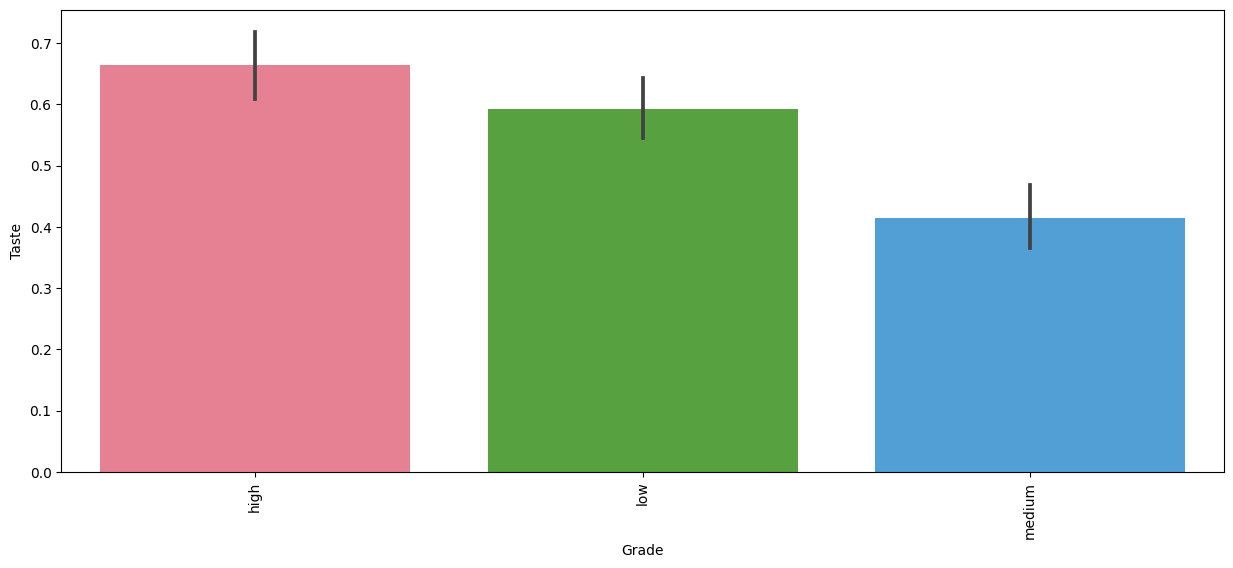

In [144]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['Taste'],x =df['Grade'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

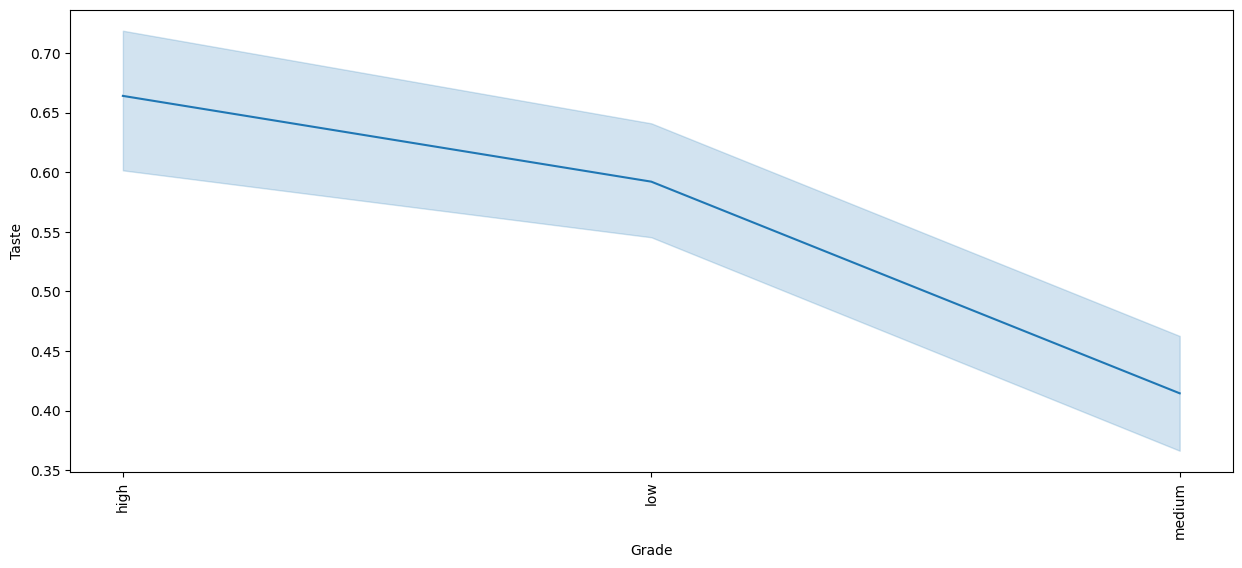

In [145]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['Taste'],x =df['Grade'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

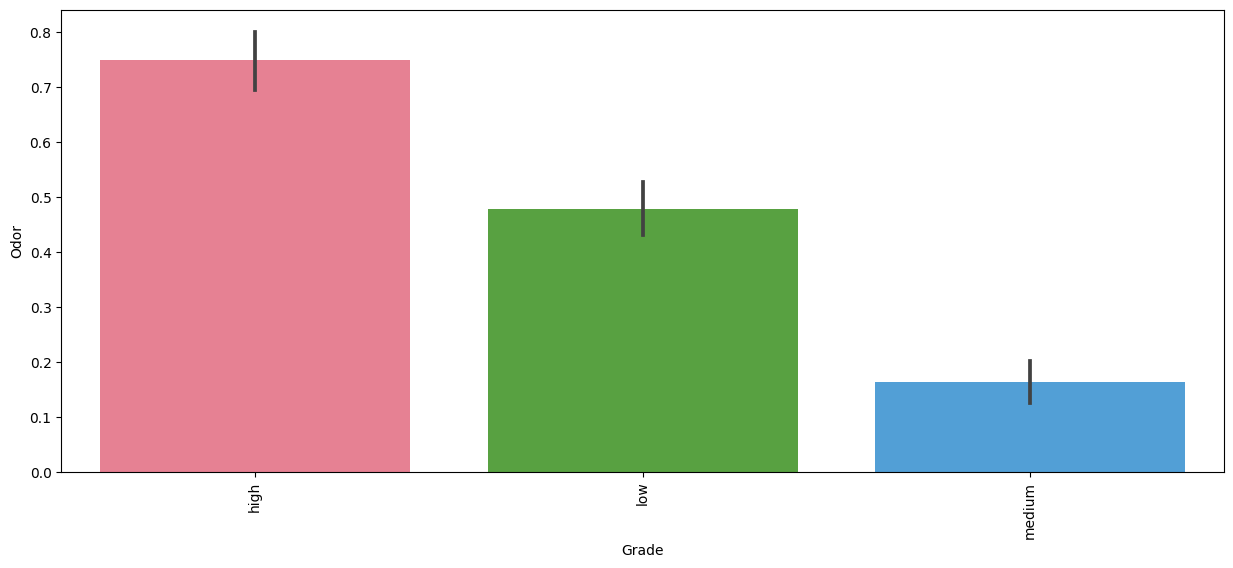

In [146]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['Odor'],x =df['Grade'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

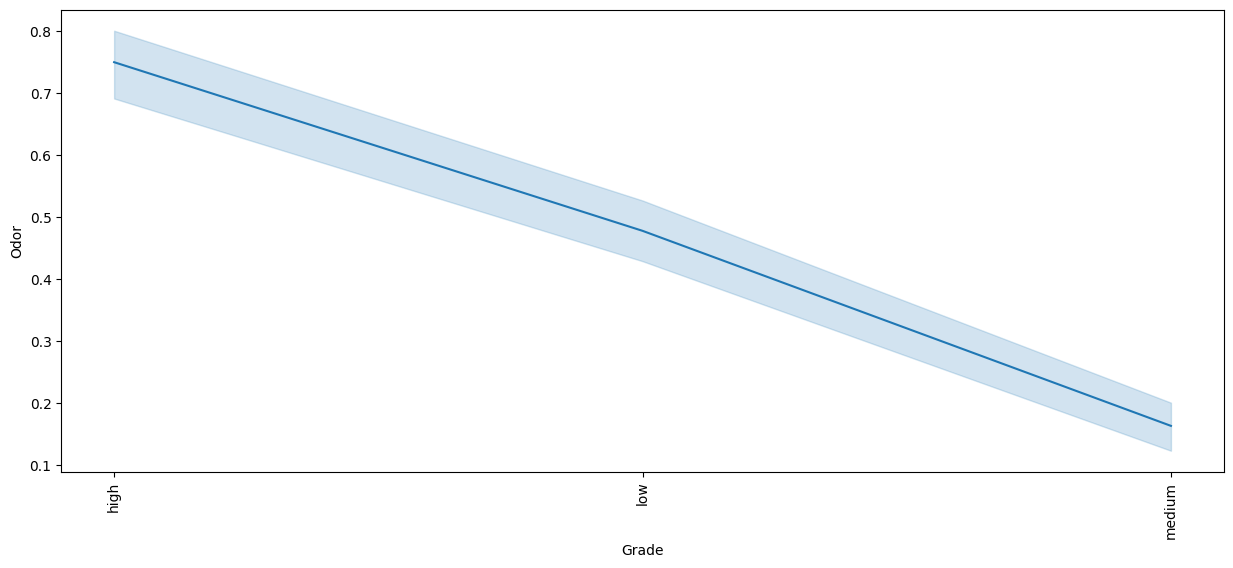

In [147]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['Odor'],x =df['Grade'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

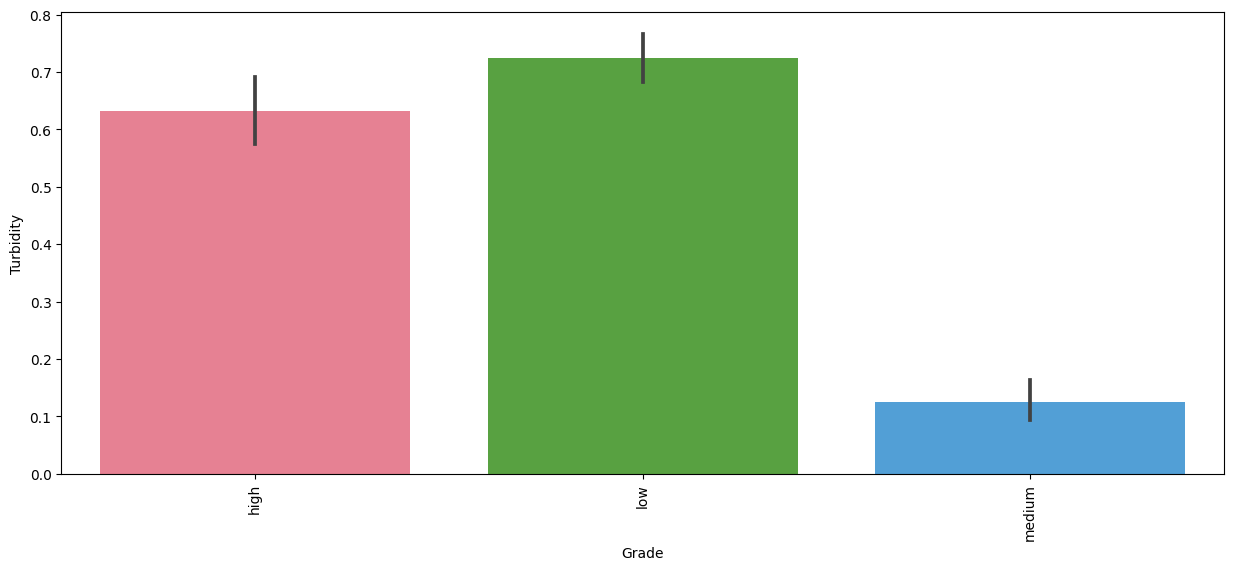

In [148]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['Turbidity'],x =df['Grade'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

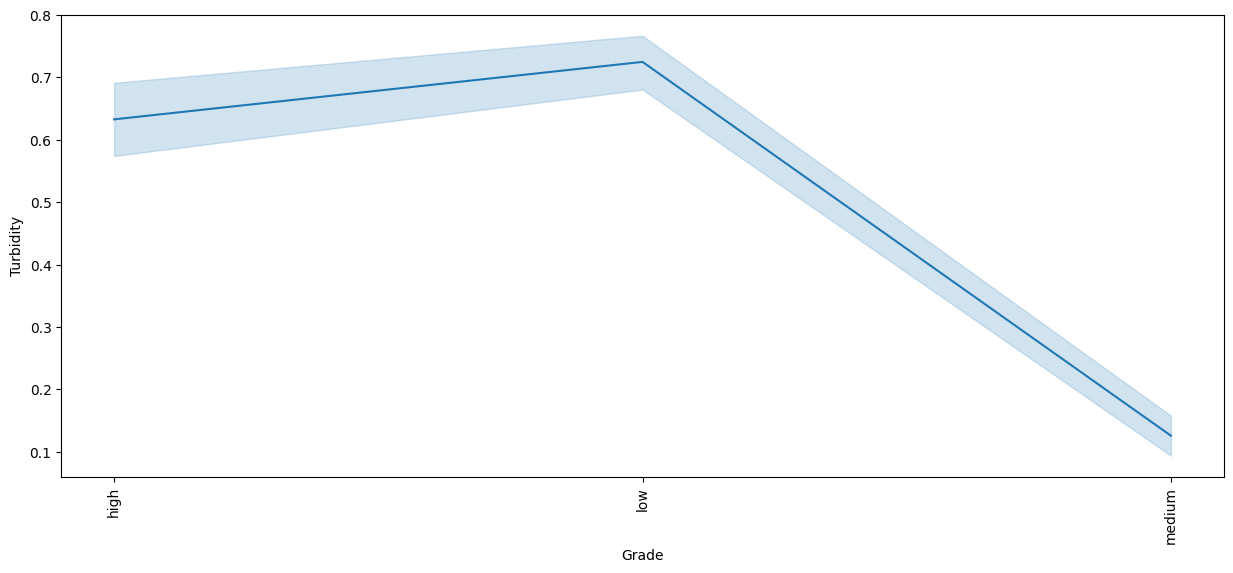

In [149]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['Turbidity'],x =df['Grade'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

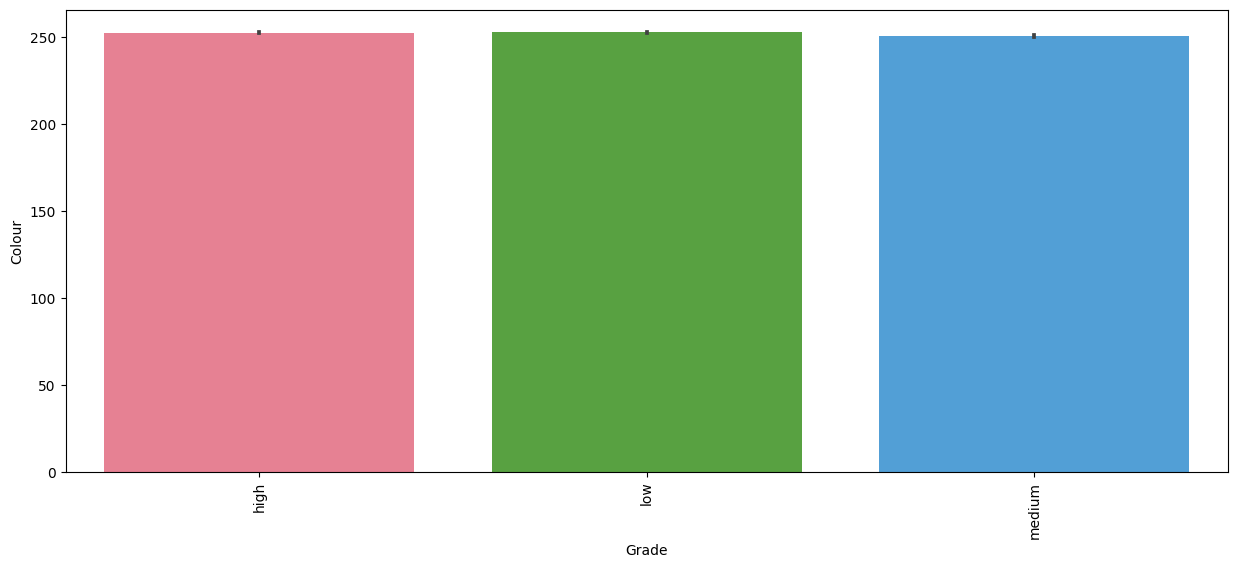

In [150]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['Colour'],x =df['Grade'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

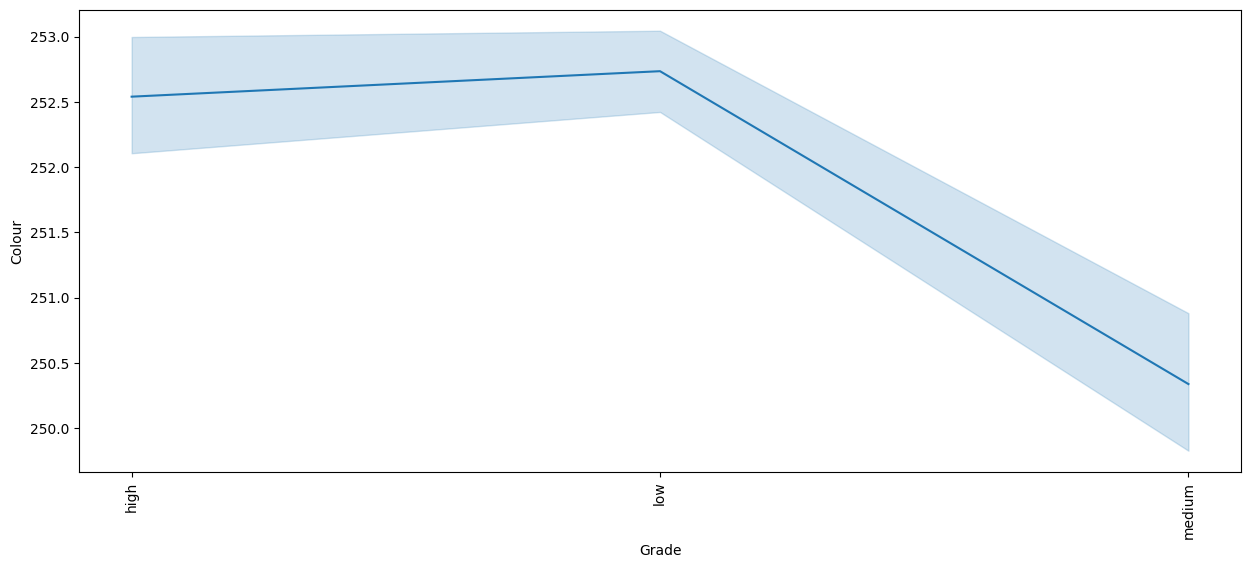

In [151]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['Colour'],x =df['Grade'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

In [152]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

In [153]:
print(label_encoder)

LabelEncoder()


In [154]:
df["Grade"] = label_encoder.fit_transform(df["Grade"])

In [155]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


In [156]:
df.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade           int32
dtype: object

In [157]:
df_corr= df.corr

In [158]:
X = df.drop('Grade', axis = 1)
y = df['Grade']

In [159]:
X

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


In [160]:
y

0       0
1       0
2       1
3       1
4       2
       ..
1054    2
1055    0
1056    1
1057    0
1058    1
Name: Grade, Length: 1059, dtype: int32

In [161]:
from sklearn.preprocessing import StandardScaler

In [162]:
X = pd.DataFrame(StandardScaler().fit_transform(X))

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [164]:
X_train

,0,1,2,3,4,5,6
5,-0.021531,-0.715962,0.910503,1.145525,0.699608,1.018105,0.733867
310,-0.021531,-0.715962,0.910503,1.145525,0.699608,1.018105,0.733867
557,-1.379627,-0.616889,0.910503,-0.872962,0.699608,-0.982217,0.733867
104,-0.736318,0.571984,-1.098294,1.145525,0.699608,1.018105,0.733867
97,-0.093010,-0.715962,-1.098294,-0.872962,-1.429372,-0.982217,0.733867
...,...,...,...,...,...,...,...
330,1.693958,-0.121525,0.910503,-0.872962,0.699608,1.018105,-0.427468
466,0.049947,0.076620,0.910503,1.145525,0.699608,-0.982217,-1.588803
121,-0.093010,-0.815035,-1.098294,-0.872962,0.699608,-0.982217,0.733867
1044,-0.021531,0.571984,-1.098294,-0.872962,-1.429372,1.018105,-0.427468


In [165]:
X_test

,0,1,2,3,4,5,6
576,-0.021531,-0.418744,0.910503,-0.872962,0.699608,1.018105,0.733867
312,-1.522584,1.562711,-1.098294,1.145525,0.699608,1.018105,-0.427468
70,1.693958,-0.121525,0.910503,-0.872962,0.699608,1.018105,-0.427468
682,0.121426,0.076620,-1.098294,-0.872962,-1.429372,1.018105,0.733867
896,-0.021531,-0.616889,-1.098294,-0.872962,-1.429372,-0.982217,0.733867
...,...,...,...,...,...,...,...
752,-0.093010,-0.815035,-1.098294,-0.872962,-1.429372,-0.982217,-1.124269
568,0.121426,-1.013180,-1.098294,-0.872962,-1.429372,1.018105,-2.750138
377,0.121426,0.076620,-1.098294,-0.872962,-1.429372,1.018105,0.733867
644,-0.093010,0.571984,0.910503,-0.872962,0.699608,-0.982217,-1.356536


In [166]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [167]:
y_pred = classifier.predict(X_test)

In [168]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [169]:
print('Confusion matrix : \n',cm)

Confusion matrix : 
 [[ 75   0   1]
 [  1 114   0]
 [  0   0 127]]


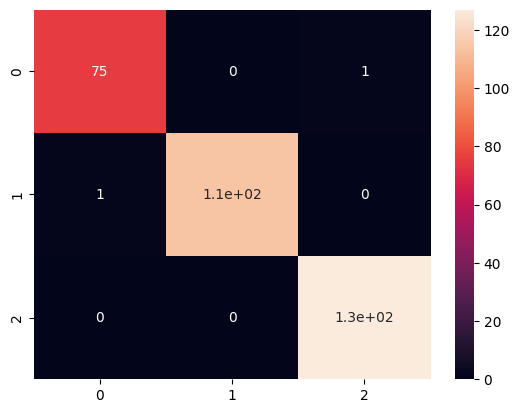

In [170]:
sns.heatmap(cm,annot = True)
plt.show()

In [171]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [172]:
print("\n Classification report for classifier %s:\n%s\n" % (classifier, metrics.classification_report(y_test,y_pred)))


 Classification report for classifier DecisionTreeClassifier(criterion='entropy', random_state=0):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        76
           1       1.00      0.99      1.00       115
           2       0.99      1.00      1.00       127

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318




In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
rfc = RandomForestClassifier(n_estimators=10,random_state=42)

In [175]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [176]:
y_pred = rfc.predict(X_test)

In [177]:
cm = confusion_matrix(y_test,y_pred)

In [178]:
cm

array([[ 76,   0,   0],
       [  1, 114,   0],
       [  0,   0, 127]], dtype=int64)

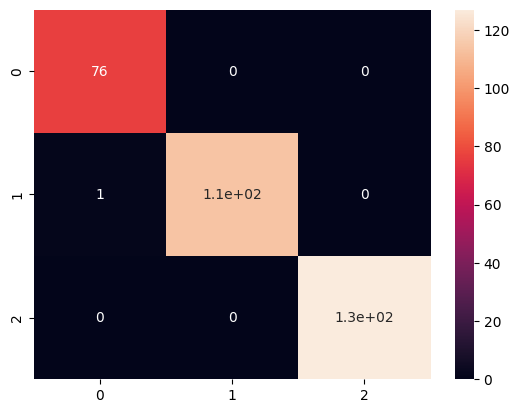

In [179]:
sns.heatmap(cm,annot=True)
plt.show()

In [180]:
print("\n Classification report for classifier %s:\n%s\n" % (rfc, metrics.classification_report(y_test,y_pred)))


 Classification report for classifier RandomForestClassifier(n_estimators=10, random_state=42):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.99      1.00       115
           2       1.00      1.00      1.00       127

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318




In [181]:
import pickle

with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)